In [1]:
# importing important modules:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Copper_Set.xlsx")
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [3]:
df.shape

(181673, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [6]:
df.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [7]:
for i in list(df.columns):
    print(f"{i} : {df[i].nunique()}")

id : 181671
item_date : 252
quantity tons : 181673
customer : 1169
country : 17
status : 9
item type : 7
application : 30
thickness : 594
width : 1386
material_ref : 16563
product_ref : 33
delivery date : 28
selling_price : 9795


In [8]:
columns_to_convert_numeric = ["quantity tons", "customer", "country", "application", "thickness", "width", "selling_price"]
df[columns_to_convert_numeric] = df[columns_to_convert_numeric].apply(pd.to_numeric, errors="coerce")

columns_to_convert_datetime = ['item_date', 'delivery date']
for i in columns_to_convert_datetime:
    df[i] = pd.to_datetime(df[i], format='%Y%m%d', errors='coerce').dt.date

In [9]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


In [11]:
# material ref column: remove values with 0000
df.loc[df['material_ref'].str.contains(r'0{10,}', na=False), 'material_ref'] = np.nan

In [12]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [13]:
#id is unimpoertant column so we can remove it
df = df.drop(['id'],axis=1)

In [14]:
df.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,NaN,1668701718,2021-04-01,1047.0


In [15]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05
mean,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918036e+03
std,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.317956e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [16]:
df.isna().sum()

item_date             3
quantity tons         1
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     100610
product_ref           0
delivery date         3
selling_price         1
dtype: int64

In [17]:
num_cols_mean = ["quantity tons" , "thickness", "selling_price"]
means = df[num_cols_mean].mean()
df[num_cols_mean] = df[num_cols_mean].fillna(means)

In [18]:
cat_cols_mode = ['item_date', 'status', 'delivery date', 'customer', 'country', 'application', 'material_ref']
modes = df[cat_cols_mode].mode().iloc[0]
df[cat_cols_mode] = df[cat_cols_mode].fillna(modes)

In [19]:
# # Make them datetime and make an additional column - delievry time, with those two dates:
df['delivery date'] = pd.to_datetime(df['delivery date'])
df['item_date'] = pd.to_datetime(df['item_date'])
df['delivery_time'] = (df['item_date']-df['delivery date']).abs().dt.days

In [20]:
df['item type'].value_counts()

item type
W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64

In [21]:
copy = df.copy()
copy.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_time
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,91
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,DX51D+Z,1668701718,2021-04-01,1047.00,0
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,90
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,90
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,31


In [22]:
# numeric fields:
numeric_columns = ['quantity tons','customer','country','application','thickness','width','product_ref','selling_price','delivery_time']

In [23]:
# Getting the skew scores:

for col in numeric_columns:
    #print(col)
    print(f"{col} : {skew(copy[col])}")

quantity tons : 424.6873099244593
customer : 86.98459014421533
country : 0.753083352867576
application : 0.7245486374533386
thickness : 303.44512882706977
width : 0.37459367901082125
product_ref : 1.0152071910463223
selling_price : 301.38559943409905
delivery_time : 0.4697802658943977


In [24]:
#visualize skew

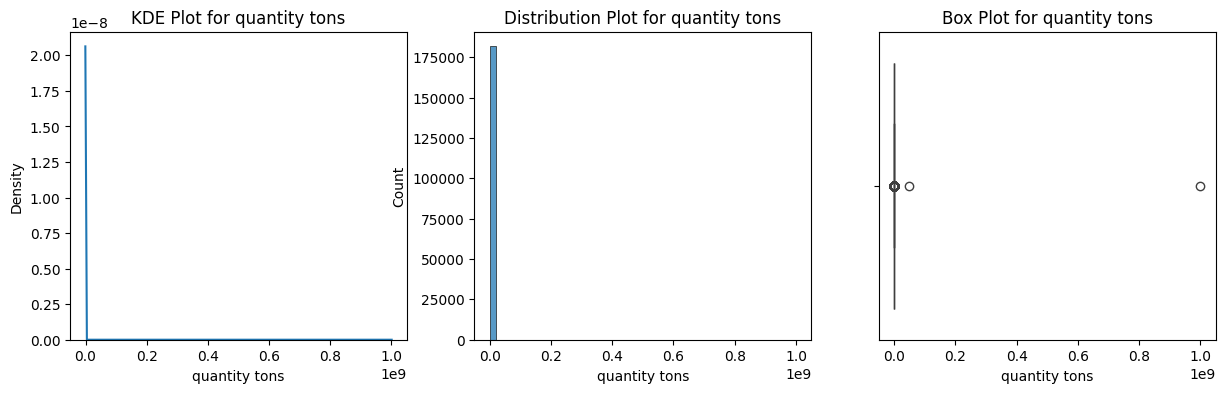

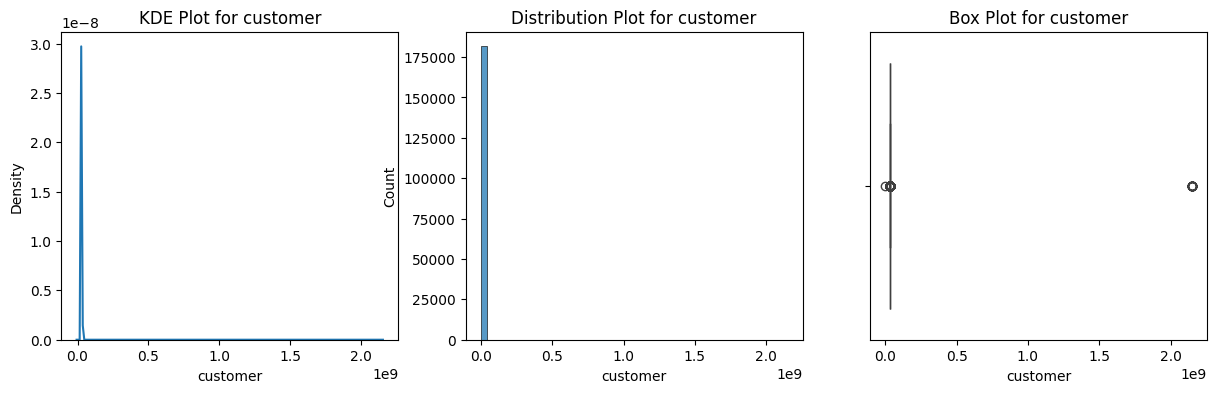

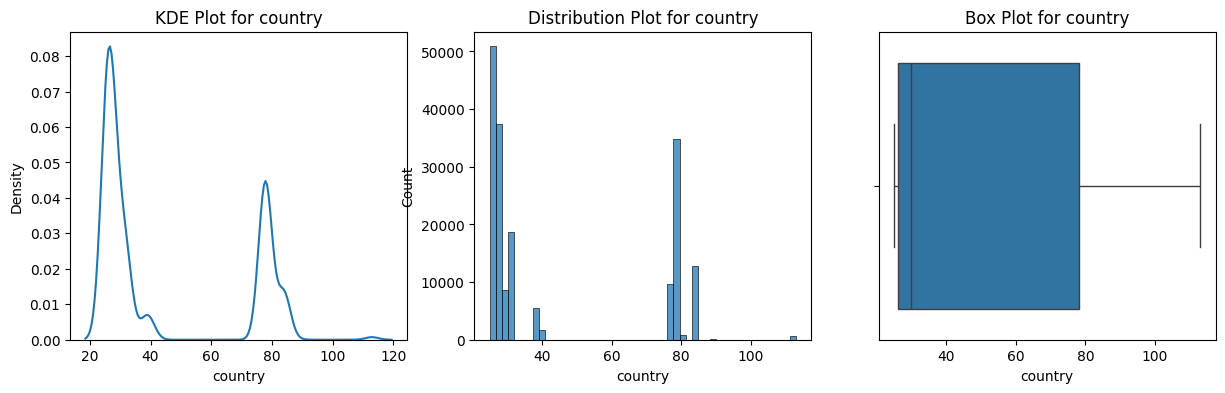

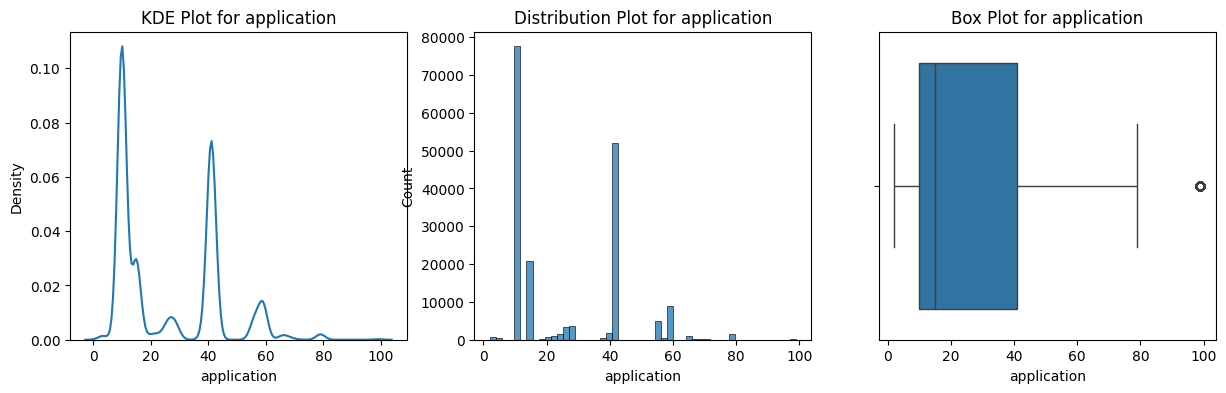

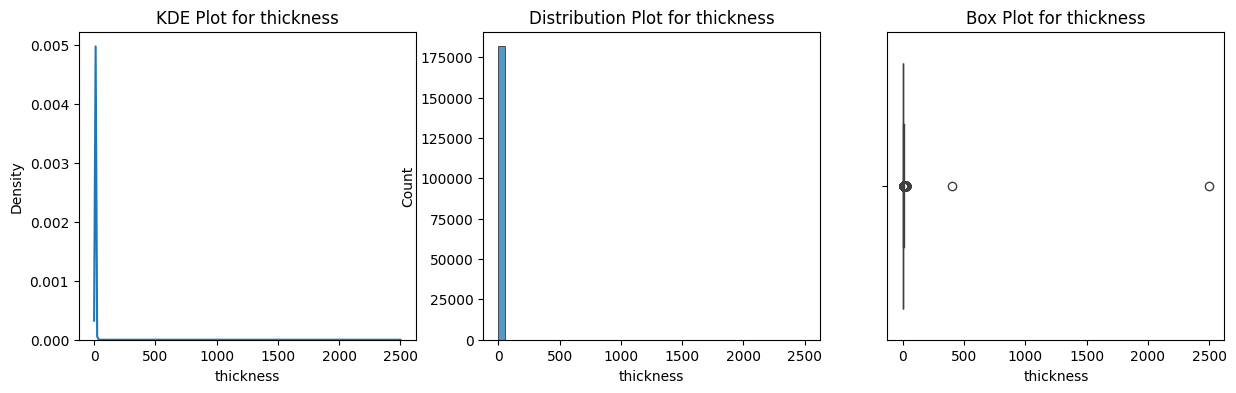

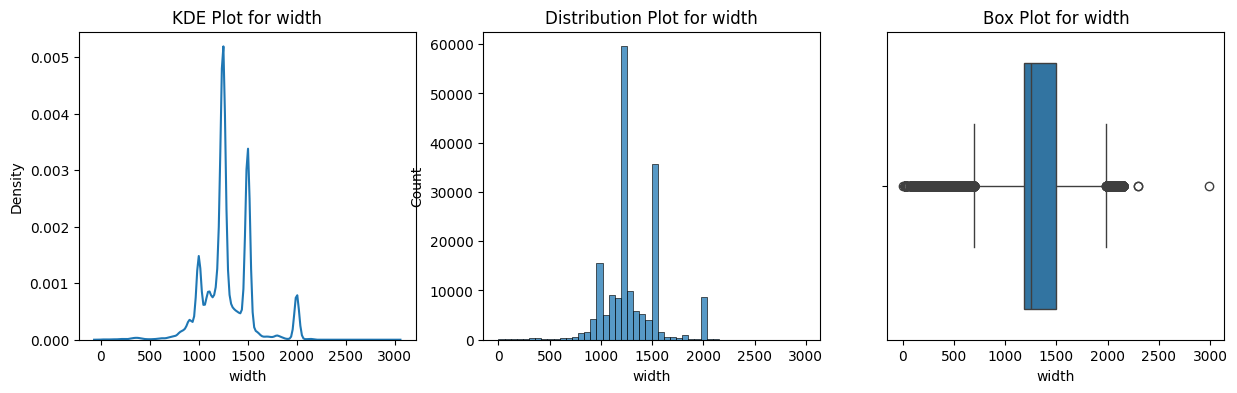

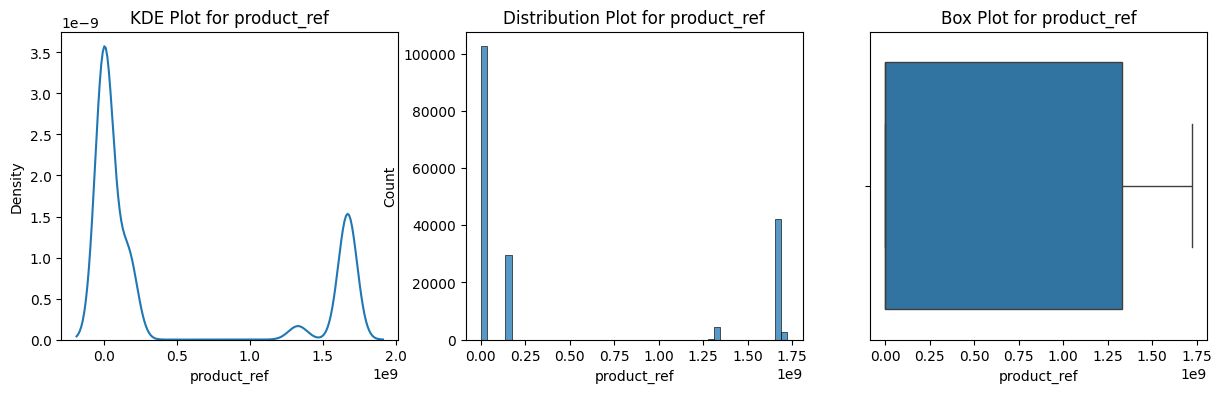

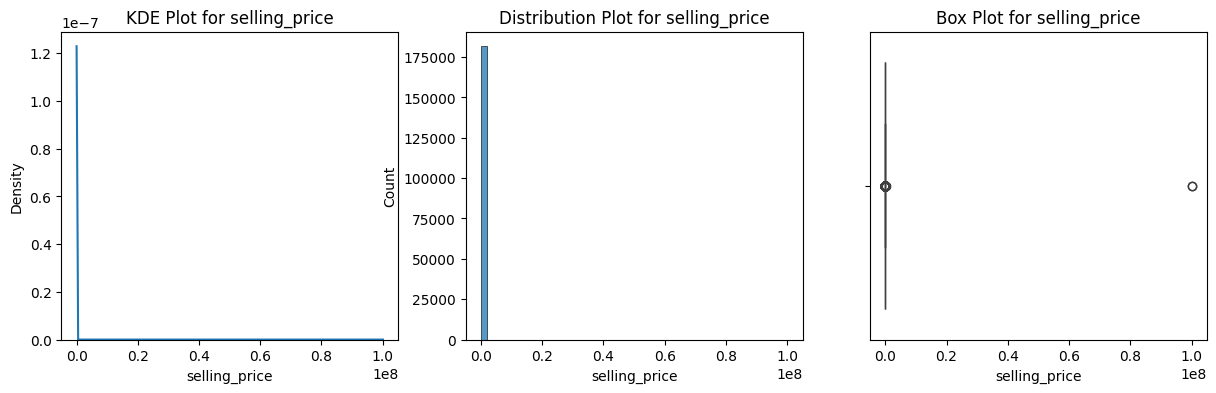

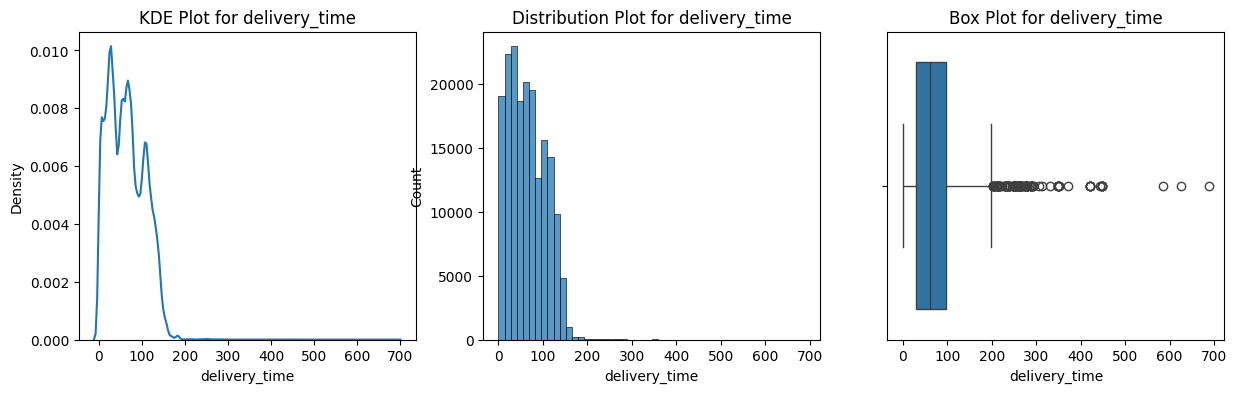

In [25]:
def plot(df, column):
    plt.figure(figsize=(20,4))
    plt.subplot(1,4,1)
    sns.kdeplot(data=df, x=column)
    plt.title(f'KDE Plot for {column}')

    plt.subplot(1,4,2)
    sns.histplot(data=df, x=column, bins=50)
    plt.title(f'Distribution Plot for {column}')
    

    plt.subplot(1,4,3)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')
    plt.show()

for col in numeric_columns:
    plot(copy, col)

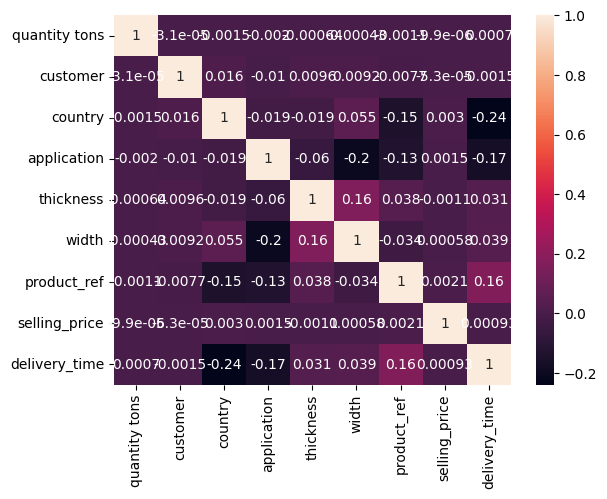

In [26]:
sns.heatmap(copy[numeric_columns].corr(),annot=True)
plt.show()

In [27]:
# there were negative values in the two columns of quantity and selling_price
# we are converting those -ve values to nan, and then removing them from the dataset.
skewed_columns = ['quantity tons', 'thickness', 'selling_price']
for column in skewed_columns:
    neg = (copy[column] <= 0)
    print(f'{column} : {neg.sum()} ')
    copy.loc[neg,column] = np.nan

quantity tons : 4 
thickness : 0 
selling_price : 7 


In [28]:
copy.dropna(inplace=True)
copy.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
delivery_time    0
dtype: int64

# Choosing the Right Transformation
From the analysis, we figured the 3 columns with high skewness. We will remove the skewness with the below transformations..

**Log Transformation:** Use when data is highly positively skewed.

**Square Root Transformation:** Use for moderate skewness.

**Box-Cox Transformation:** Requires data to be positive; useful for a wide range of skewness.

**Yeo-Johnson Transformation:** Useful when data includes zero or negative values

We will go with the **log transformation**  since we see a high positive skew in our data.


In [29]:
# log transformation:
copy['quantity_tons_log']=np.log(copy['quantity tons'])
copy['thickness_log']=np.log(copy['thickness'])
copy['selling_price_log']=np.log(copy['selling_price'])
copy.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_time,quantity_tons_log,thickness_log,selling_price_log
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,91,3.991779,0.693147,6.749931
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,DX51D+Z,1668701718,2021-04-01,1047.00,0,6.643822,-0.223144,6.953684
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,90,5.956169,-0.967584,6.468211
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,90,5.310301,0.832909,6.643790
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,31,6.666354,1.386294,6.357842


In [30]:
copy.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181662,2020-11-26 22:55:58.509760,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,181662.0,5875.290738,0.00001,10.970879,30.365013,67.161415,1000000000.0,2349145.895941
customer,181662.0,30512226.281704,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24334485.222329
country,181662.0,44.898933,25.0,26.0,30.0,78.0,113.0,24.406038
application,181662.0,25.613342,2.0,10.0,15.0,41.0,99.0,17.753943
thickness,181662.0,2.551133,0.18,0.7,1.5,3.0,400.0,2.977116
width,181662.0,1295.289042,1.0,1180.0,1250.0,1500.0,2990.0,261.638547
product_ref,181662.0,473948584.656709,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717503310.723927
delivery date,181662,2021-01-25 22:43:27.048254464,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181662.0,1918.15583,0.1,669.0,812.0,953.0,100001015.0,331804.774316


In [31]:
# removing those columns with skewness:
copy.drop(columns=['quantity tons','thickness','selling_price'], inplace=True)

In [32]:
# Outliers handle with IQR and cliping method 

def outlier(df, column):
    # IQR = Q3 - Q1
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

# Using the function created to handle outliers in our dataset:
outlier(copy,'quantity_tons_log')
outlier(copy,'thickness_log')
outlier(copy,'selling_price_log')
outlier(copy,'width')

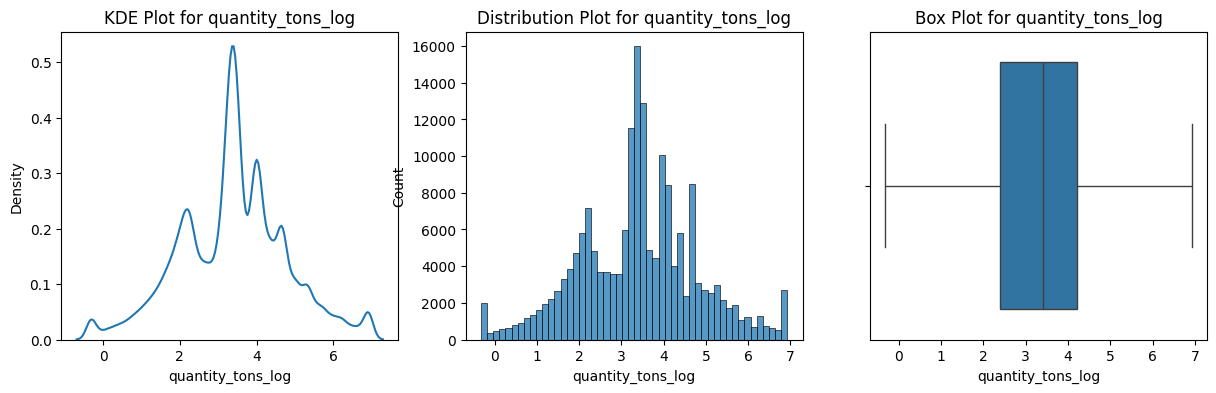

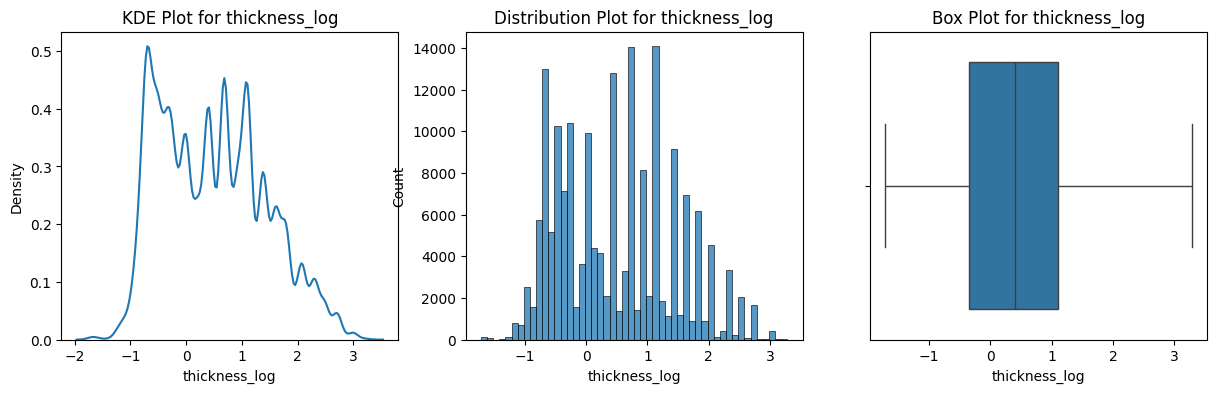

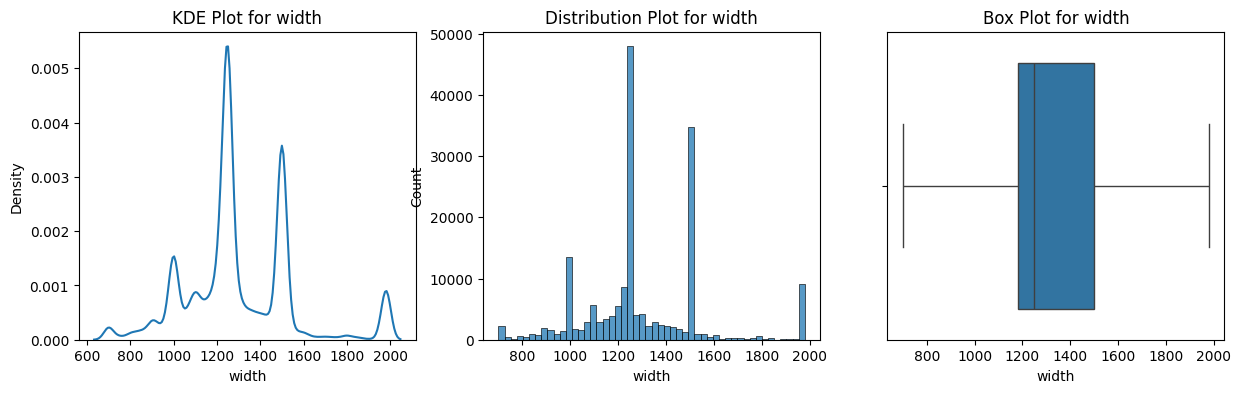

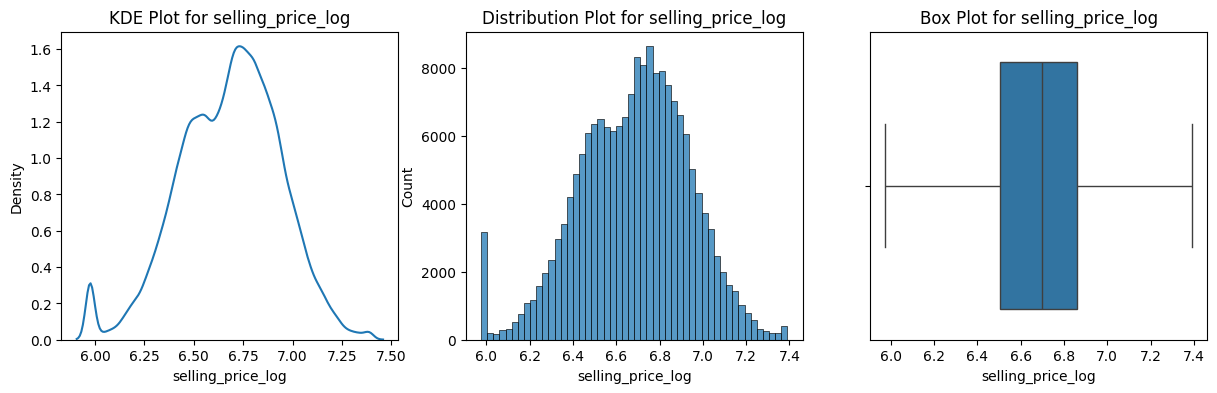

In [33]:
# Plotting after skew and outliers 

new_cols = ['quantity_tons_log', 'thickness_log', 'width', 'selling_price_log']
for col in new_cols:
    plot(copy, col)

In [34]:
# copy of out_copp:
copy2 = copy.copy(True)
copy2.head(2)

,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,delivery_time,quantity_tons_log,thickness_log,selling_price_log
0,2021-04-01,30156308.0,28.0,Won,W,10.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,91,3.991779,0.693147,6.749931
1,2021-04-01,30202938.0,25.0,Won,W,41.0,1210.0,DX51D+Z,1668701718,2021-04-01,0,6.643822,-0.223144,6.953684


In [35]:
# identifying categorical cols and encoding it..
copy2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181662 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   item_date          181662 non-null  datetime64[ns]
 1   customer           181662 non-null  float64       
 2   country            181662 non-null  float64       
 3   status             181662 non-null  object        
 4   item type          181662 non-null  object        
 5   application        181662 non-null  float64       
 6   width              181662 non-null  float64       
 7   material_ref       181662 non-null  object        
 8   product_ref        181662 non-null  int64         
 9   delivery date      181662 non-null  datetime64[ns]
 10  delivery_time      181662 non-null  int64         
 11  quantity_tons_log  181662 non-null  float64       
 12  thickness_log      181662 non-null  float64       
 13  selling_price_log  181662 non-null  float64      

In [36]:
# taking the status field and seeing the value counts:
copy2['status'].value_counts()

status
Won                116004
Lost                34438
Not lost for AM     19571
Revised              4276
To be approved       4170
Draft                3139
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [37]:
# Using map function, we are encoding the values for the status column which we will be using for the classification model:

copy2['status']= copy2['status'].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':4,
                                'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})
copy2['status'].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8], dtype=int64)

In [38]:
copy2['item type'].value_counts()

item type
W         105607
S          69234
PL          5659
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64

In [39]:
# using ordinal encoder to encode the values in item type column

copy2["item type"]= OrdinalEncoder().fit_transform(copy2[["item type"]])
copy2['item type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [40]:
copy2['country'].value_counts()

country
78.0     32111
26.0     27515
25.0     23358
27.0     21508
32.0     18657
28.0     15824
84.0     12776
77.0      9714
30.0      8701
39.0      3731
79.0      2742
38.0      1712
40.0      1683
80.0       819
113.0      714
89.0        92
107.0        5
Name: count, dtype: int64

In [41]:
# using ordinal encoder to encode the values in country column

copy2["country"]= OrdinalEncoder().fit_transform(copy2[["country"]])
copy2['country'].unique()

array([ 3.,  0.,  4.,  5.,  6., 10.,  2.,  9., 16., 11.,  1.,  7.,  8.,
       13., 12., 15., 14.])

In [42]:
copy2.head(3)

,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,delivery_time,quantity_tons_log,thickness_log,selling_price_log
0,2021-04-01,30156308.0,3.0,1,5.0,10.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,91,3.991779,0.693147,6.749931
1,2021-04-01,30202938.0,0.0,1,5.0,41.0,1210.0,DX51D+Z,1668701718,2021-04-01,0,6.643822,-0.223144,6.953684
2,2021-04-01,30153963.0,4.0,1,6.0,28.0,952.0,S0380700,628377,2021-01-01,90,5.956169,-0.967584,6.468211


In [43]:
copy.head(3)

,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,delivery_time,quantity_tons_log,thickness_log,selling_price_log
0,2021-04-01,30156308.0,28.0,Won,W,10.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,91,3.991779,0.693147,6.749931
1,2021-04-01,30202938.0,25.0,Won,W,41.0,1210.0,DX51D+Z,1668701718,2021-04-01,0,6.643822,-0.223144,6.953684
2,2021-04-01,30153963.0,30.0,Won,WI,28.0,952.0,S0380700,628377,2021-01-01,90,5.956169,-0.967584,6.468211


<Axes: >

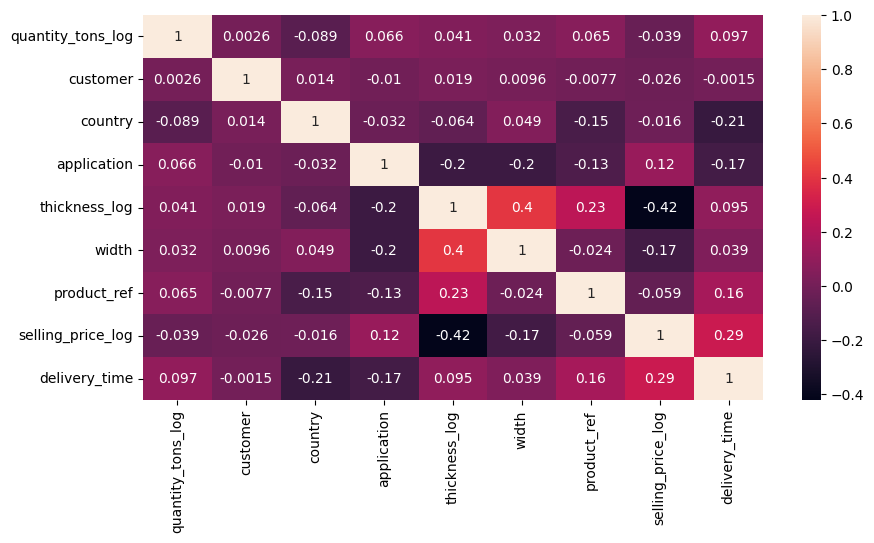

In [44]:
corr = copy2[['quantity_tons_log', 'customer', 'country', 'application', 'thickness_log', 'width','product_ref', 'selling_price_log','delivery_time']].corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True)

# Model Building 

In [45]:
copp_df = copy2.copy(True)
# we are taking the required columns for x and y:
X = copp_df.drop(columns=['selling_price_log','item_date','delivery date','material_ref'],axis=1)
y = copp_df['selling_price_log']
# split the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# Models of choice for regression to predict selling price:
We will be using 4 regression models here: **Random Forest Regressor, Extra Trees Regressor, Extreme Gradient Boosting Regressor, Decision Tree Regressor.** With the knowledge that since there is much linearity in the data, we are not testing out the linear regression model for this particular data and are going with tree based regressor models

In [46]:
# Create an instance of each regression model
rand_model = RandomForestRegressor()
et_model = ExtraTreesRegressor()
xgb_model = XGBRegressor()
dt_model = DecisionTreeRegressor()

# Running those 4 models

In [47]:
# 1. Random forest regressor:
rand_model.fit(X_train, y_train)
rand_preds = rand_model.predict(X_test) # make predictions
# Evaluate the model performance:
rand_mse = mean_squared_error(y_test, rand_preds)
rand_mae = mean_absolute_error(y_test, rand_preds)
rand_r2 = r2_score(y_test, rand_preds)
print(f" r2scor : {rand_r2} \n mse : {rand_mse} \n mae : {rand_mae}")

 r2scor : 0.9164720352078128 
 mse : 0.005450491027746512 
 mae : 0.04591864653791598


In [48]:
# 2. Extra Trees Regressor:
et_model.fit(X_train, y_train)
et_preds = et_model.predict(X_test)
et_mse = mean_squared_error(y_test, et_preds)
et_mae = mean_absolute_error(y_test, et_preds)
et_r2 = r2_score(y_test, et_preds)

In [49]:
# 3. XGBoost Regressor:
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

In [50]:
# 4. Decision Tree Regressor:
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_preds)
dt_mae = mean_absolute_error(y_test, dt_preds)
dt_r2 = r2_score(y_test, dt_preds)

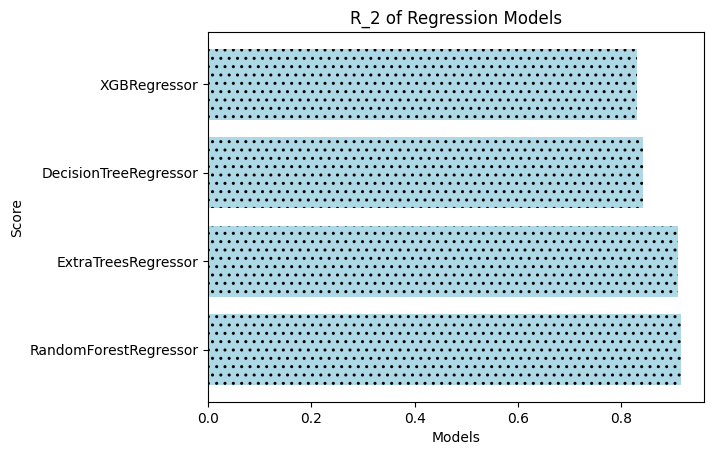

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

RandomForestRegressor 0.9164720352078128
ExtraTreesRegressor 0.911492213875172
DecisionTreeRegressor 0.8435059177544058
XGBRegressor 0.8320933148168221

Best Model: RandomForestRegressor contain Maximum R2_Score: 0.9164720352078128 


In [51]:
# Finding the best model based on the R2 score:

models = ['RandomForestRegressor','ExtraTreesRegressor', 'DecisionTreeRegressor', 'XGBRegressor']
score = [rand_r2, et_r2, dt_r2, xgb_r2]

plt.barh(models, score, color='lightblue',hatch='..')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('R_2 of Regression Models')
plt.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nBest Model: {max_model} contain Maximum R2_Score: {max_score} ")

In [52]:
copp_df.shape

(181662, 14)

param_grid = { 'n_estimators' :[100,170], 
              'max_depth': [10,30],
              'min_samples_split': [2,6], 
              'min_samples_leaf': [1,3], 
              'max_features' : ['sqrt', 'log2', None] 
             }

grid_srh_cv = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3, n_jobs=-1) 
grid_srh_cv.fit(X_train, y_train)

rf_model_v1 = RandomForestRegressor() rf_model_v1.fit(X_train, y_train) 
rf_preds = rf_model_v1.predict(X_test) # make predictions

rf_mse = mean_squared_error(y_test, rf_preds) 
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds)) 
rf_mae = mean_absolute_error(y_test, rf_preds) 
rf_r2 = r2_score(y_test, rf_preds)

In [53]:
# finalising the model:
model = rand_model.fit(X_train, y_train)

# creating a pickle file of that:
file_path='RandomForestRegressor.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(model, file)
print(f'Pickle file created: {file_path}')

Pickle file created: RandomForestRegressor.pkl


In [ ]:
et_model = et_model.fit(X_train, y_train)
xgb_model = xgb_model.fit(X_train, y_train)
dt_model = dt_model.fit(X_train, y_train)

# pickling all the models:
file_path1='ExtraTreesRegressor.pkl'
with open(file_path1, 'wb') as file:
    pickle.dump(et_model, file)
print(f'Pickle file created: {file_path1}')

file_path2='XGBRegressor.pkl'
with open(file_path2, 'wb') as file:
    pickle.dump(xgb_model, file)
print(f'Pickle file created: {file_path2}')

In [55]:
file_path3='DecisionTreeRegressor.pkl'
with open(file_path3, 'wb') as file:
    pickle.dump(dt_model, file)
print(f'Pickle file created: {file_path3}')

Pickle file created: DecisionTreeRegressor.pkl


product_ref          0.290119
delivery_time        0.240677
status               0.168898
country              0.071007
customer             0.067704
quantity_tons_log    0.050346
thickness_log        0.047462
application          0.023756
width                0.020547
item type            0.019483
dtype: float64


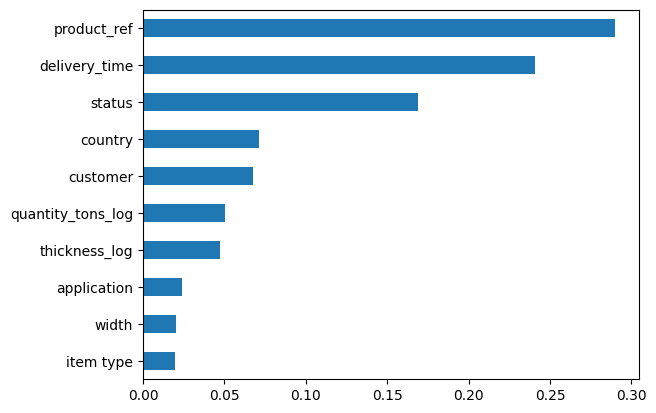

In [57]:
#checkig the features scores and importants

feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_scores)

# visualising the important features:
feature_scores.nlargest(10).plot(kind='barh').invert_yaxis()

In [58]:
# load the file and try to predict the value:
with open('RandomForestRegressor.pkl','rb') as files:
    predict_model=pickle.load(files)

pre=predict_model.predict(np.array([[30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147]]))
print("Predicted selling price: ",np.exp(pre[0]))

Predicted selling price:  934.7982415947381


In [65]:
pred = predict_model.predict(np.array([[30202938.0,0.0,1,5.0,41.0,1210.0,1668701718,0,6.643822,-0.223144]]))
print("Predicted selling price: ",np.exp(pred[0]))

Predicted selling price:  1020.3103809221602


In [66]:
np.exp(6.953684)

1046.9997792185711

# Classification model - Predicting the status:
When coming to predicting the classification of the status, we are using 3 classification models:

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc

In [70]:
# Filter out the values (won|lost) in status column

copp_df_s = copp_df[(copp_df.status==1)|(copp_df.status==0)]
copp_df_s

,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,delivery_time,quantity_tons_log,thickness_log,selling_price_log
0,2021-04-01,30156308.0,3.0,1,5.0,10.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,91,3.991779,0.693147,6.749931
1,2021-04-01,30202938.0,0.0,1,5.0,41.0,1210.0,DX51D+Z,1668701718,2021-04-01,0,6.643822,-0.223144,6.953684
2,2021-04-01,30153963.0,4.0,1,6.0,28.0,952.0,S0380700,628377,2021-01-01,90,5.956169,-0.967584,6.468211
3,2021-04-01,30349574.0,5.0,1,3.0,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,90,5.310301,0.832909,6.643790
4,2021-04-01,30211560.0,3.0,1,5.0,10.0,1980.0,2_S275JR+AR-CL1,640665,2021-03-01,31,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,2020-07-02,30200854.0,0.0,1,5.0,41.0,1240.0,DX51D+Z,164141591,2020-07-01,1,4.670802,-0.040822,6.400257
181668,2020-07-02,30200854.0,0.0,1,5.0,41.0,1220.0,DX51D+Z,164141591,2020-07-01,1,4.629691,-0.040822,6.381816
181669,2020-07-02,30200854.0,0.0,1,5.0,41.0,1500.0,DX51D+Z,164141591,2020-07-01,1,5.337954,-0.051293,6.378426
181670,2020-07-02,30200854.0,0.0,1,5.0,41.0,1250.0,DX51D+Z,164141591,2020-07-01,1,1.443523,-0.342490,6.428105


In [73]:
copp_df_s['status'].value_counts()

status
1    116004
0     34438
Name: count, dtype: int64

## Synthetic imputting:
Since we are on a classifier model prediction, we should ensure that the categories are closer in percentage in the dataset. If not, like in our case, we should be doing synthetic data imputting of either oversampling or undersampling.

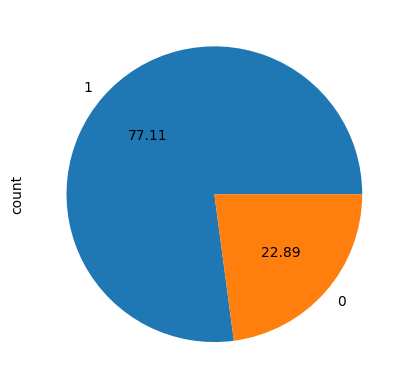

In [74]:
# Looking at the percentage of data present in the status column:
perc_status = copp_df_s['status'].value_counts().plot.pie(autopct='%.2f')

Text(0.5, 1.0, 'over oversampling using smote')

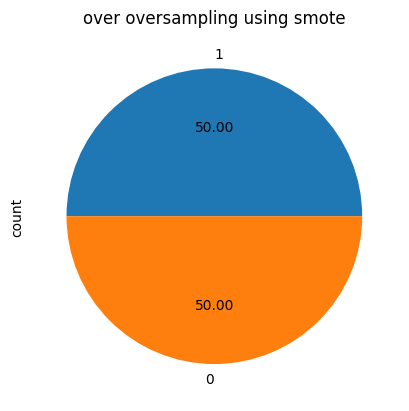

In [75]:
# oversampling the data with SMOTE:
X = copp_df_s.drop(columns = ['status','item_date','delivery date','material_ref'],axis=1)
y = copp_df_s['status']

smote= SMOTE()

X_smote, y_smote = smote.fit_resample(X,y) 

sm = y_smote.value_counts().plot.pie(autopct='%.2f')
sm.set_title('over oversampling using smote')

In [76]:
# classifier model:

# train test split from the dataset where smote was applied:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=5)

In [82]:
# Create instances of each classification model

# random forest:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train) # train model
rfc_preds = rfc_model.predict(X_test) # make predictions on the test
# evaluate with metrics
rfc_accuracy = accuracy_score(y_test, rfc_preds)
rfc_precision = metrics.precision_score(y_test, rfc_preds)
rfc_recall = metrics.recall_score(y_test, rfc_preds)
rfc_f1 = metrics.f1_score(y_test, rfc_preds)

In [83]:

# Extra Trees Classification model:
etc_model = ExtraTreesClassifier()
etc_model.fit(X_train, y_train)
etc_preds = etc_model.predict(X_test)
# evaluation metrics:
etc_accuracy = accuracy_score(y_test, etc_preds)
etc_precision = metrics.precision_score(y_test, etc_preds)
etc_recall = metrics.recall_score(y_test, etc_preds)
etc_f1 = metrics.f1_score(y_test, etc_preds)

In [84]:

# XGBoost Classifier model:
xgbc_model = xgb.XGBClassifier()
xgbc_model.fit(X_train, y_train)
xgbc_preds = xgbc_model.predict(X_test)
# model evaluation metrics:
xgbc_accuracy = accuracy_score(y_test, xgbc_preds)
xgbc_precision = metrics.precision_score(y_test, xgbc_preds)
xgbc_recall = metrics.recall_score(y_test, xgbc_preds)
xgbc_f1 = metrics.f1_score(y_test, xgbc_preds)


In [85]:
# Accuracy scores of all the models:
print('All model accuracies :\n')
print('Random Forest Accuracy: ', rfc_accuracy)
print('Extra Trees Accuracy: ',etc_accuracy)
print('XGBoost Accuracy: ', xgbc_accuracy)

All model accuracies :

Random Forest Accuracy:  0.974613163225723
Extra Trees Accuracy:  0.9772279930462767
XGBoost Accuracy:  0.9333649411663291


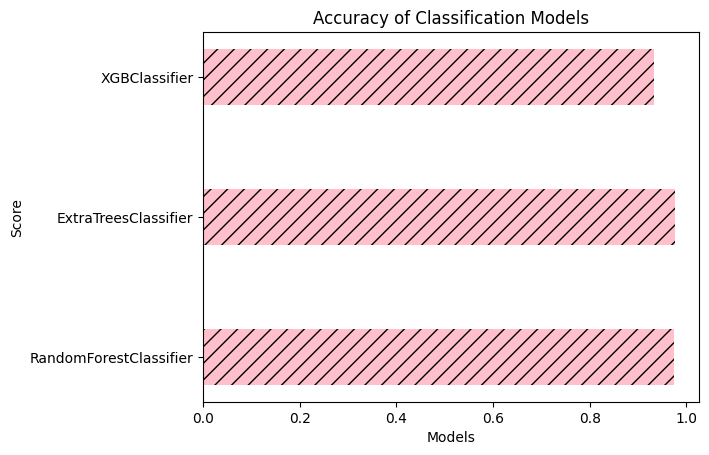

FINDING BEST FIT MODEL FOR EVALUATION BASED ON  ACCURACY:

RandomForestClassifier 0.974613163225723
ExtraTreesClassifier 0.9772279930462767
XGBClassifier 0.9333649411663291

Best Model: ExtraTreesClassifier contains Maximum accuracy: 0.9772279930462767 


In [86]:
models = ['RandomForestClassifier', 'ExtraTreesClassifier', 'XGBClassifier']
score = [rfc_accuracy, etc_accuracy, xgbc_accuracy]

plt.barh(models, score, color='pink', height=0.4, hatch='//')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Accuracy of Classification Models')
plt.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON  ACCURACY:\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nBest Model: {max_model} contains Maximum accuracy: {max_score} ")

In [87]:
# saving and pickling the model:
model_etc = etc_model.fit(X_train, y_train)

file_path4='ExtraTreesClassifier.pkl'
with open(file_path4, 'wb') as file:
    pickle.dump(model_etc, file)
print(f'Pickle file created: {file_path4}')

Pickle file created: ExtraTreesClassifier.pkl


In [88]:
# evaluation metrics
print(metrics.confusion_matrix(y_test,etc_preds))
print(metrics.classification_report(y_test,etc_preds))

[[34512   447]
 [ 1138 33506]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     34959
           1       0.99      0.97      0.98     34644

    accuracy                           0.98     69603
   macro avg       0.98      0.98      0.98     69603
weighted avg       0.98      0.98      0.98     69603



In [89]:
#checkig the features scores and importants

feature_scores = pd.Series(model_etc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

delivery_time        0.184742
customer             0.128201
country              0.115919
item type            0.110546
quantity_tons_log    0.099967
application          0.093050
selling_price_log    0.086586
thickness_log        0.069038
product_ref          0.063609
width                0.048342
dtype: float64

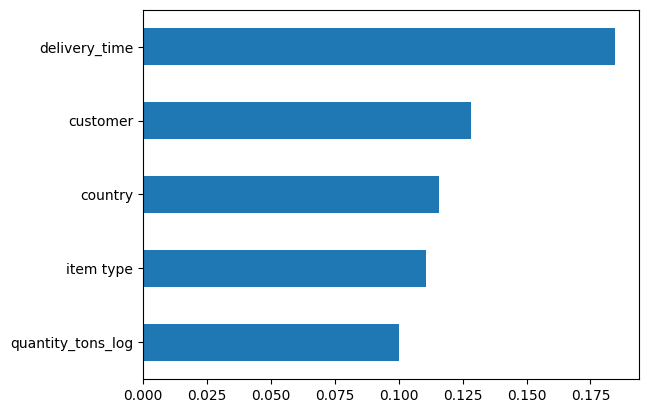

In [90]:
# visualising the important features:
feature_scores.nlargest(5).plot(kind='barh').invert_yaxis()

In [91]:
# load the pickle and predict the status with classifier model

with open('ExtraTreesClassifier.pkl','rb') as files:
    model_et_cls=pickle.load(files)

etc = model_et_cls.predict( np.array([[30156308.0,1.0,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931]]))
if etc[0] == 1:
    print('Won')
else:
    print('Lose')

Won


In [92]:
print(rand_mse)
print(et_mse)
print(xgb_mse)
print(dt_mse)

0.005450491027746512
0.005775441738096856
0.010956496825541838
0.010211784679504355
